In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

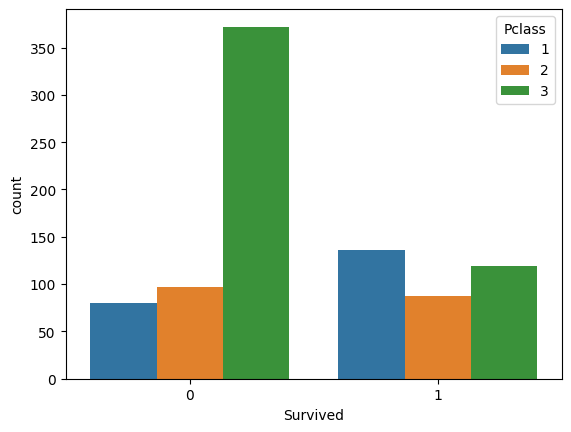

In [4]:
sns.countplot(x='Survived',data=train_data,hue='Pclass')

<ipython-input-5-3cb74380519d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Age'],kde=False)


<Axes: xlabel='Age'>

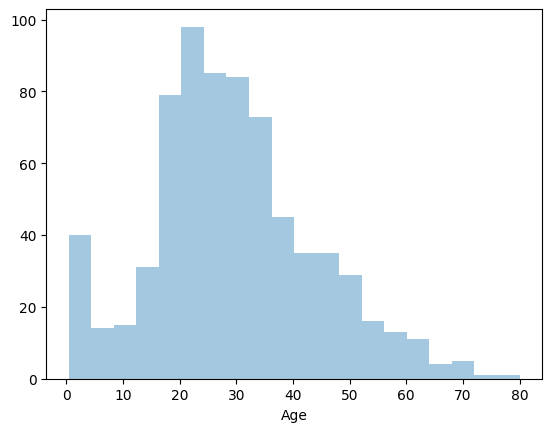

In [5]:
sns.distplot(train_data['Age'],kde=False)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
print(train_data[train_data['Pclass']==1]['Age'].mean())
print(train_data[train_data['Pclass']==2]['Age'].mean())
print(train_data[train_data['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [9]:
def fill_na_values(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return round(train_data[train_data['Pclass']==1]['Age'].mean())
    elif pclass == 2:
      return round(train_data[train_data['Pclass']==2]['Age'].mean())
    elif pclass == 3:
      return round(train_data[train_data['Pclass']==3]['Age'].mean())
  else:
    return age


train_data['Age'] = train_data[['Age','Pclass']].apply(fill_na_values,axis=1)

In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
## dropping Cabin due to too many missing values

train_data.drop(['Cabin'],axis=1,inplace=True)

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
train_data.dropna(inplace=True)

In [14]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
## dropping unwanted features

train_data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [16]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
# one hot encoding the categorical data

#finding the different types in embarked and sex

print(train_data['Sex'].unique())
print(train_data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [18]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embarked = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [19]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [20]:
train_data.drop(['Sex','Embarked'],axis=1,inplace=True)
train_data = pd.concat([train_data,sex,embarked],axis=1)

In [21]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
## Normalizing data

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X= train_data.drop('Survived',axis=1)
Y= train_data['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)


In [23]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
## SVM method

from sklearn.svm import SVC

svm=SVC()
svm.fit(X_train,Y_train)

predictions = svm.predict(X_test)


In [25]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))


              precision    recall  f1-score   support

           0       0.75      0.98      0.85        52
           1       0.95      0.54      0.69        37

    accuracy                           0.80        89
   macro avg       0.85      0.76      0.77        89
weighted avg       0.83      0.80      0.78        89

[[51  1]
 [17 20]]


In [27]:
## logistic regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

lr_predict=lr.predict(X_test)

print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,lr_predict))


              precision    recall  f1-score   support

           0       0.75      0.98      0.85        52
           1       0.95      0.54      0.69        37

    accuracy                           0.80        89
   macro avg       0.85      0.76      0.77        89
weighted avg       0.83      0.80      0.78        89

[[46  6]
 [11 26]]


In [35]:
## k nearest neighbours

from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,Y_train)
k_predict=knn.predict(X_test)


print(classification_report(Y_test,k_predict))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        52
           1       0.83      0.68      0.75        37

    accuracy                           0.81        89
   macro avg       0.81      0.79      0.80        89
weighted avg       0.81      0.81      0.81        89

[[51  1]
 [17 20]]


In [37]:
# decision tree and random forest

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt=DecisionTreeClassifier()
rfc=RandomForestClassifier()

dt.fit(X_train,Y_train)
rfc.fit(X_train,Y_train)

d_predict=dt.predict(X_test)
rfc_predict=rfc.predict(X_test)

print(classification_report(Y_test,d_predict))
print(confusion_matrix(Y_test,predictions))

print(classification_report(Y_test,rfc_predict))
print(confusion_matrix(Y_test,predictions))



              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.76      0.68      0.71        37

    accuracy                           0.78        89
   macro avg       0.77      0.76      0.76        89
weighted avg       0.77      0.78      0.77        89

[[51  1]
 [17 20]]
              precision    recall  f1-score   support

           0       0.79      0.88      0.84        52
           1       0.81      0.68      0.74        37

    accuracy                           0.80        89
   macro avg       0.80      0.78      0.79        89
weighted avg       0.80      0.80      0.79        89

[[51  1]
 [17 20]]
